# Experimental data analysis for web app project
2020-12-22

### Data files:
- Plant_1_Generation_Data.csv
- Plant_2_Generation_Data.csv
- Plant_1_Weather_Sensor_Data.csv
- Plant_2_Weather_Sensor_Data.csv

---
### Importing libraries

In [1]:
import pandas as pd
import plotly.graph_objs as go
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

%matplotlib inline

---
### Custom functions

---
### Importing data

In [2]:
df_gen_1 = pd.read_csv('Plant_1_Generation_Data.csv')
df_gen_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68778 entries, 0 to 68777
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   DATE_TIME    68778 non-null  object 
 1   PLANT_ID     68778 non-null  int64  
 2   SOURCE_KEY   68778 non-null  object 
 3   DC_POWER     68778 non-null  float64
 4   AC_POWER     68778 non-null  float64
 5   DAILY_YIELD  68778 non-null  float64
 6   TOTAL_YIELD  68778 non-null  float64
dtypes: float64(4), int64(1), object(2)
memory usage: 3.7+ MB


In [3]:
df_gen_1['DATE_TIME'] = pd.to_datetime(df_gen_1['DATE_TIME'])

In [4]:
df_gen_1.describe()

,PLANT_ID,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD
count,68778.0,68778.000000,68778.000000,68778.000000,6.877800e+04
mean,4135001.0,3147.426211,307.802752,3295.968737,6.978712e+06
std,0.0,4036.457169,394.396439,3145.178309,4.162720e+05
min,4135001.0,0.000000,0.000000,0.000000,6.183645e+06
25%,4135001.0,0.000000,0.000000,0.000000,6.512003e+06
50%,4135001.0,429.000000,41.493750,2658.714286,7.146685e+06
75%,4135001.0,6366.964286,623.618750,6274.000000,7.268706e+06
max,4135001.0,14471.125000,1410.950000,9163.000000,7.846821e+06


In [5]:
df_gen_1.head()

,DATE_TIME,PLANT_ID,SOURCE_KEY,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD
0,2020-05-15,4135001,1BY6WEcLGh8j5v7,0.0,0.0,0.0,6259559.0
1,2020-05-15,4135001,1IF53ai7Xc0U56Y,0.0,0.0,0.0,6183645.0
2,2020-05-15,4135001,3PZuoBAID5Wc2HD,0.0,0.0,0.0,6987759.0
3,2020-05-15,4135001,7JYdWkrLSPkdwr4,0.0,0.0,0.0,7602960.0
4,2020-05-15,4135001,McdE0feGgRqW7Ca,0.0,0.0,0.0,7158964.0


In [6]:
df_gen_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68778 entries, 0 to 68777
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   DATE_TIME    68778 non-null  datetime64[ns]
 1   PLANT_ID     68778 non-null  int64         
 2   SOURCE_KEY   68778 non-null  object        
 3   DC_POWER     68778 non-null  float64       
 4   AC_POWER     68778 non-null  float64       
 5   DAILY_YIELD  68778 non-null  float64       
 6   TOTAL_YIELD  68778 non-null  float64       
dtypes: datetime64[ns](1), float64(4), int64(1), object(1)
memory usage: 3.7+ MB


In [7]:
df_gen_2 = pd.read_csv('Plant_2_Generation_Data.csv')

In [8]:
df_gen_2['DATE_TIME'] = pd.to_datetime(df_gen_2['DATE_TIME'])

In [9]:
df_gen_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67698 entries, 0 to 67697
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   DATE_TIME    67698 non-null  datetime64[ns]
 1   PLANT_ID     67698 non-null  int64         
 2   SOURCE_KEY   67698 non-null  object        
 3   DC_POWER     67698 non-null  float64       
 4   AC_POWER     67698 non-null  float64       
 5   DAILY_YIELD  67698 non-null  float64       
 6   TOTAL_YIELD  67698 non-null  float64       
dtypes: datetime64[ns](1), float64(4), int64(1), object(1)
memory usage: 3.6+ MB


In [10]:
df_gen_2

,DATE_TIME,PLANT_ID,SOURCE_KEY,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD
0,2020-05-15 00:00:00,4136001,4UPUqMRk7TRMgml,0.0,0.0,9425.000000,2.429011e+06
1,2020-05-15 00:00:00,4136001,81aHJ1q11NBPMrL,0.0,0.0,0.000000,1.215279e+09
2,2020-05-15 00:00:00,4136001,9kRcWv60rDACzjR,0.0,0.0,3075.333333,2.247720e+09
3,2020-05-15 00:00:00,4136001,Et9kgGMDl729KT4,0.0,0.0,269.933333,1.704250e+06
4,2020-05-15 00:00:00,4136001,IQ2d7wF4YD8zU1Q,0.0,0.0,3177.000000,1.994153e+07
...,...,...,...,...,...,...,...
67693,2020-06-17 23:45:00,4136001,q49J1IKaHRwDQnt,0.0,0.0,4157.000000,5.207580e+05
67694,2020-06-17 23:45:00,4136001,rrq4fwE8jgrTyWY,0.0,0.0,3931.000000,1.211314e+08
67695,2020-06-17 23:45:00,4136001,vOuJvMaM2sgwLmb,0.0,0.0,4322.000000,2.427691e+06
67696,2020-06-17 23:45:00,4136001,xMbIugepa2P7lBB,0.0,0.0,4218.000000,1.068964e+08


In [11]:
df_gen_1

,DATE_TIME,PLANT_ID,SOURCE_KEY,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD
0,2020-05-15 00:00:00,4135001,1BY6WEcLGh8j5v7,0.0,0.0,0.000,6259559.0
1,2020-05-15 00:00:00,4135001,1IF53ai7Xc0U56Y,0.0,0.0,0.000,6183645.0
2,2020-05-15 00:00:00,4135001,3PZuoBAID5Wc2HD,0.0,0.0,0.000,6987759.0
3,2020-05-15 00:00:00,4135001,7JYdWkrLSPkdwr4,0.0,0.0,0.000,7602960.0
4,2020-05-15 00:00:00,4135001,McdE0feGgRqW7Ca,0.0,0.0,0.000,7158964.0
...,...,...,...,...,...,...,...
68773,2020-06-17 23:45:00,4135001,uHbuxQJl8lW7ozc,0.0,0.0,5967.000,7287002.0
68774,2020-06-17 23:45:00,4135001,wCURE6d3bPkepu2,0.0,0.0,5147.625,7028601.0
68775,2020-06-17 23:45:00,4135001,z9Y9gH1T5YWrNuG,0.0,0.0,5819.000,7251204.0
68776,2020-06-17 23:45:00,4135001,zBIq5rxdHJRwDNY,0.0,0.0,5817.000,6583369.0


The two data sets are two different power plants.

In [12]:
df_gen_1['date'] = df_gen_1['DATE_TIME'].dt.date

In [13]:
df_gen_1_dly = df_gen_1.groupby('date').agg({'DC_POWER': 'sum', 'AC_POWER': 'sum', 'DAILY_YIELD': 'max'})

<AxesSubplot:xlabel='date'>

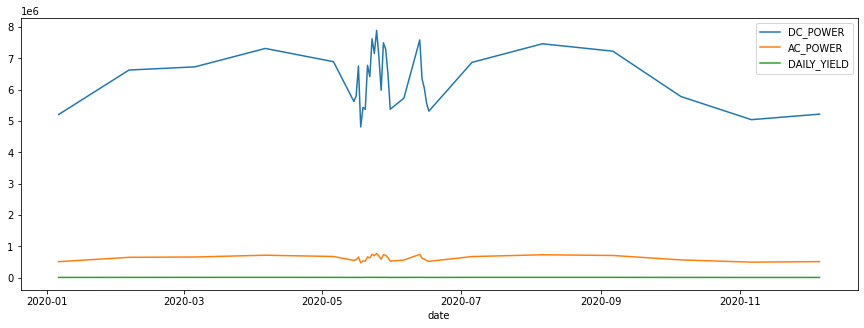

In [14]:
df_gen_1_dly.plot(figsize=(15,5))

<AxesSubplot:xlabel='date'>

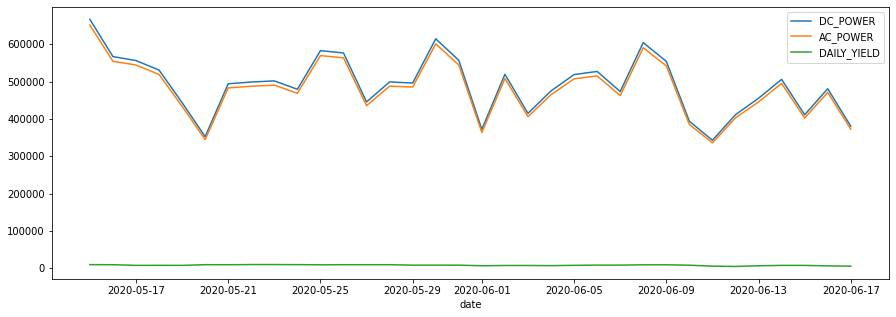

In [15]:
df_gen_2['date'] = df_gen_2['DATE_TIME'].dt.date
df_gen_2_dly = df_gen_2.groupby('date').agg({'DC_POWER': 'sum', 'AC_POWER': 'sum', 'DAILY_YIELD': 'max'})
df_gen_2_dly.plot(figsize=(15,5))

In [16]:
df_weather_1 = pd.read_csv('Plant_1_Weather_Sensor_Data.csv')

In [17]:
df_weather_1

,DATE_TIME,PLANT_ID,SOURCE_KEY,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION
0,2020-05-15 00:00:00,4135001,HmiyD2TTLFNqkNe,25.184316,22.857507,0.0
1,2020-05-15 00:15:00,4135001,HmiyD2TTLFNqkNe,25.084589,22.761668,0.0
2,2020-05-15 00:30:00,4135001,HmiyD2TTLFNqkNe,24.935753,22.592306,0.0
3,2020-05-15 00:45:00,4135001,HmiyD2TTLFNqkNe,24.846130,22.360852,0.0
4,2020-05-15 01:00:00,4135001,HmiyD2TTLFNqkNe,24.621525,22.165423,0.0
...,...,...,...,...,...,...
3177,2020-06-17 22:45:00,4135001,HmiyD2TTLFNqkNe,22.150570,21.480377,0.0
3178,2020-06-17 23:00:00,4135001,HmiyD2TTLFNqkNe,22.129816,21.389024,0.0
3179,2020-06-17 23:15:00,4135001,HmiyD2TTLFNqkNe,22.008275,20.709211,0.0
3180,2020-06-17 23:30:00,4135001,HmiyD2TTLFNqkNe,21.969495,20.734963,0.0


In [18]:
df_weather_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3182 entries, 0 to 3181
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   DATE_TIME            3182 non-null   object 
 1   PLANT_ID             3182 non-null   int64  
 2   SOURCE_KEY           3182 non-null   object 
 3   AMBIENT_TEMPERATURE  3182 non-null   float64
 4   MODULE_TEMPERATURE   3182 non-null   float64
 5   IRRADIATION          3182 non-null   float64
dtypes: float64(3), int64(1), object(2)
memory usage: 149.3+ KB


In [19]:
df_weather_1['DATE_TIME'] = pd.to_datetime(df_weather_1['DATE_TIME'])

In [20]:
df_weather_1['date'] = df_weather_1['DATE_TIME'].dt.date
df_weather_1_dly = df_weather_1.groupby('date').agg({'AMBIENT_TEMPERATURE': 'mean', 'MODULE_TEMPERATURE': 'mean', 'IRRADIATION': 'sum'})

<AxesSubplot:xlabel='date'>

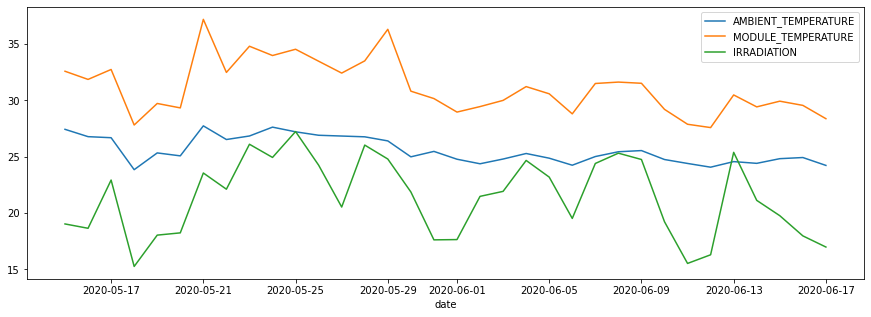

In [21]:
df_weather_1_dly.plot(figsize=(15,5))

In [22]:
df_gen_1_dly = df_gen_1_dly.merge(df_weather_1_dly, on='date')

In [23]:
df_gen_1_dly.head()

,DC_POWER,AC_POWER,DAILY_YIELD,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION
date,,,,,,
2020-05-15,5.627239e+06,550830.959402,6471.0,27.430823,32.582964,19.037010
2020-05-16,5.806138e+06,568359.821428,6714.0,26.780538,31.858851,18.651690
2020-05-17,6.759595e+06,660975.389285,7867.0,26.686727,32.740435,22.931378
2020-05-18,4.812549e+06,470969.708929,5506.0,23.850938,27.814344,15.266485
2020-05-19,5.437955e+06,532250.491070,7007.0,25.338021,29.725163,18.044861


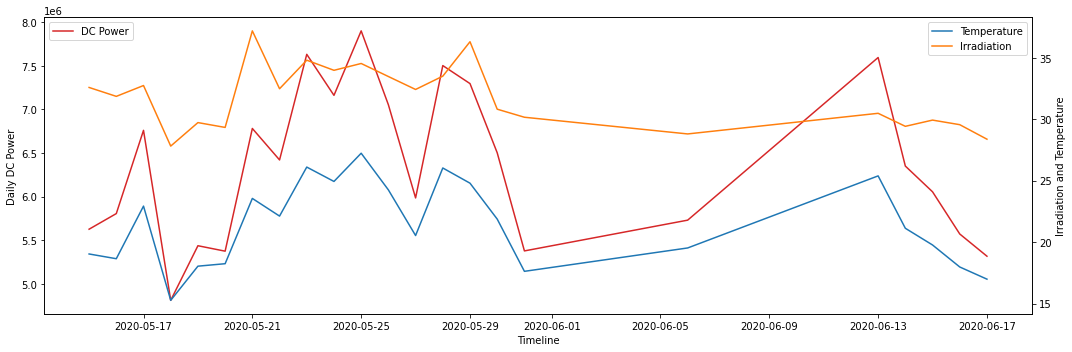

In [24]:
data1 = df_gen_1_dly['DC_POWER']
data2 = df_gen_1_dly[['IRRADIATION']]
data3 = df_gen_1_dly[['MODULE_TEMPERATURE']]

fig, ax1 = plt.subplots(figsize=(15,5))

color = 'tab:red'
ax1.set_xlabel('Timeline')
ax1.set_ylabel('Daily DC Power')
ax1.plot(df_gen_1_dly.index, data1, color=color)
plt.legend(['DC Power'], loc=2)
#ax1.tick_params(axis='y')

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

#color = 'tab:blue'
ax2.set_ylabel('Irradiation and Temperature')  # we already handled the x-label with ax1
ax2.plot(df_gen_1_dly.index, data2)

ax3 = ax2
ax3.plot(df_gen_1_dly.index, data3)
#ax2.tick_params(axis='y')

plt.legend(['Temperature', 'Irradiation'])

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

<AxesSubplot:xlabel='date'>

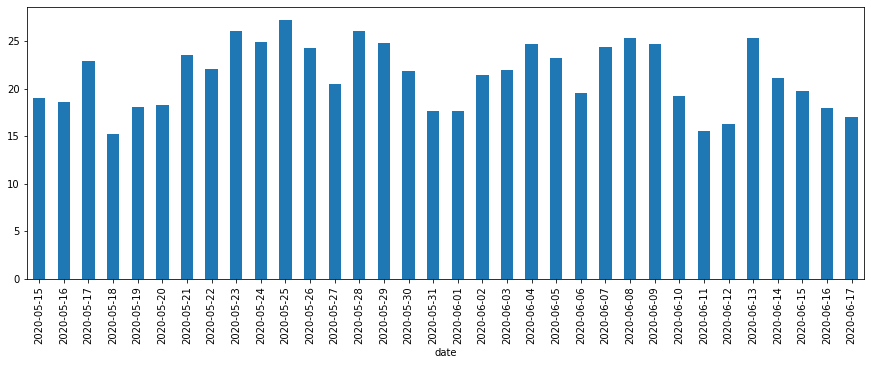

In [25]:
df_weather_1_dly['IRRADIATION'].plot(figsize=(15,5), kind='bar')

In [26]:
df_weather_may_25 = df_weather_1.loc[df_weather_1.date == pd.to_datetime('2020-05-25')][['IRRADIATION', 'DATE_TIME']]

<AxesSubplot:xlabel='DATE_TIME'>

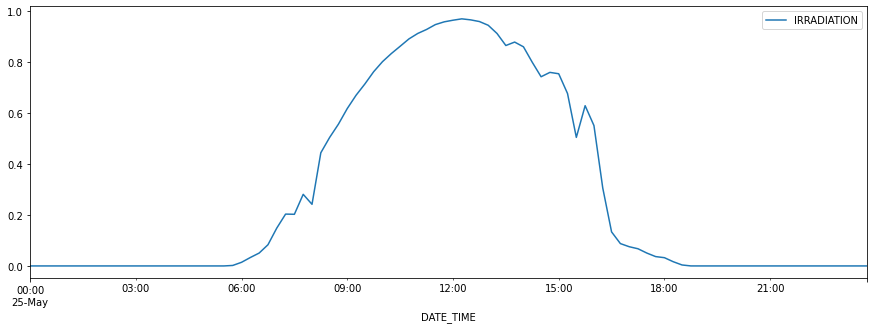

In [27]:
df_weather_may_25.plot(figsize = (15,5), x='DATE_TIME')

In [28]:
df_gen = df_gen_1_dly.merge(df_gen_2_dly, on='date')

In [29]:
df_gen.head()

,DC_POWER_x,AC_POWER_x,DAILY_YIELD_x,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION,DC_POWER_y,AC_POWER_y,DAILY_YIELD_y
date,,,,,,,,,
2020-05-15,5.627239e+06,550830.959402,6471.0,27.430823,32.582964,19.037010,666607.630952,651437.736667,9663.0
2020-05-16,5.806138e+06,568359.821428,6714.0,26.780538,31.858851,18.651690,566839.840000,554253.460476,9465.0
2020-05-17,6.759595e+06,660975.389285,7867.0,26.686727,32.740435,22.931378,556236.918205,544393.020916,7722.0
2020-05-18,4.812549e+06,470969.708929,5506.0,23.850938,27.814344,15.266485,530773.677143,519012.565238,7818.0
2020-05-19,5.437955e+06,532250.491070,7007.0,25.338021,29.725163,18.044861,443495.847015,433554.722647,7696.0


<AxesSubplot:ylabel='None'>

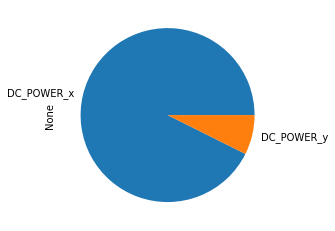

In [30]:
df_gen[['DC_POWER_x', 'DC_POWER_y']].sum().plot(kind='pie')